In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report

In [ ]:
pokemon = pd.read_csv("pokemon.csv")  # Load Pokemon Dataset
combats = pd.read_csv("combats.csv")  # Load Combats Dataset

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
print(pokemon.nunique())

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64


Text(0, 0.5, 'Frequency')

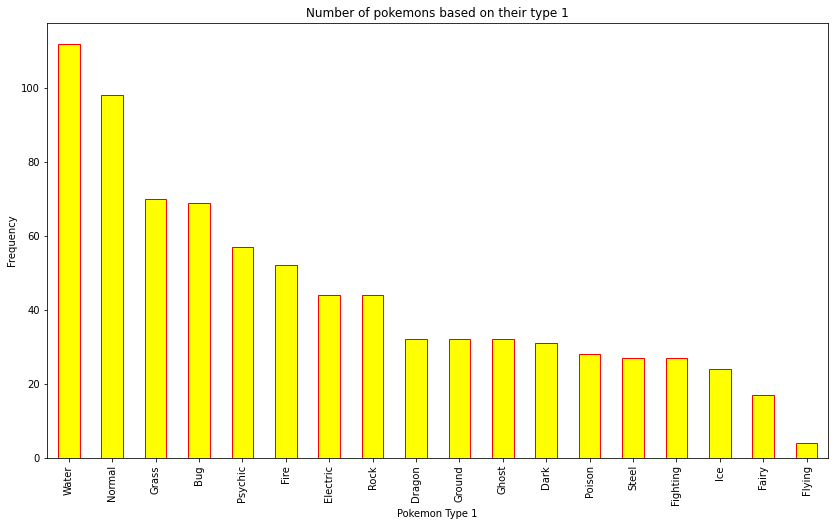

In [ ]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 1'].value_counts().plot(kind='bar',color="yellow",edgecolor="red", figsize=(14,8), title="Number of pokemons based on their type 1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

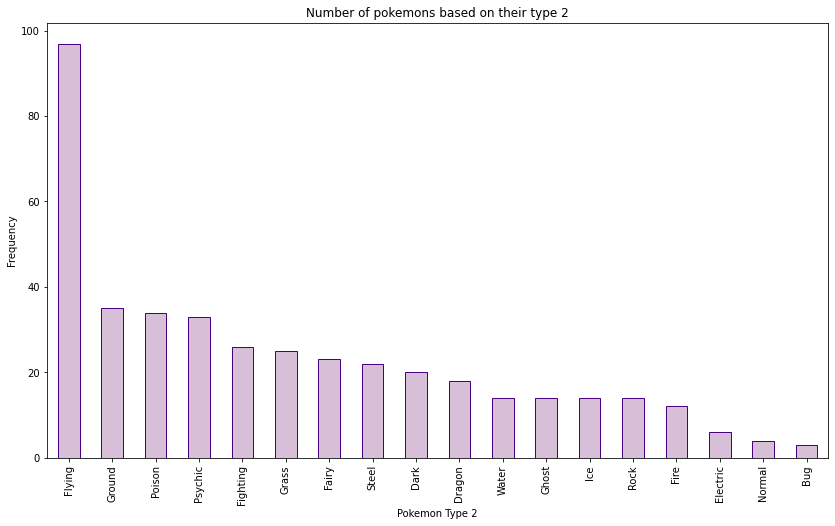

In [ ]:
ax = pokemon['Type 2'].value_counts().plot(kind='bar',color="thistle",edgecolor="indigo", figsize=(14,8), title="Number of pokemons based on their type 2")
ax.set_xlabel("Pokemon Type 2")
ax.set_ylabel("Frequency")

In [ ]:
number = pokemon["#"]
print('Total number of Pokemons is', len(number))

Total number of Pokemons is 800


In [ ]:
Legendary = pokemon["Legendary"]
rate = np.mean(Legendary == True)
print('legendary rate=', rate)

legendary rate= 0.08125


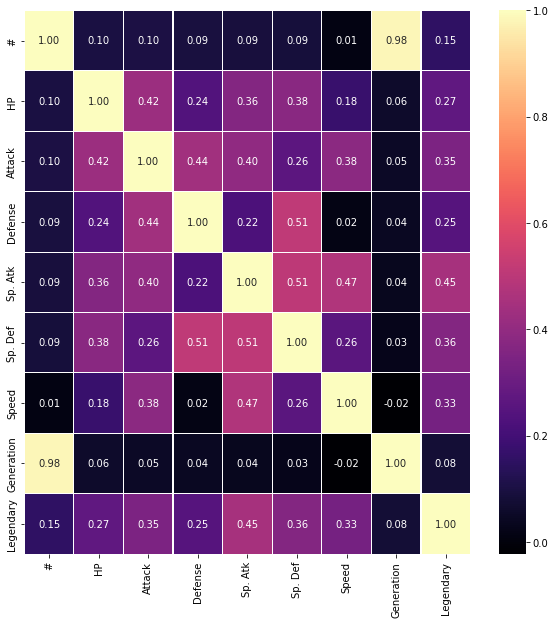

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pokemon.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap="magma")
plt.show()

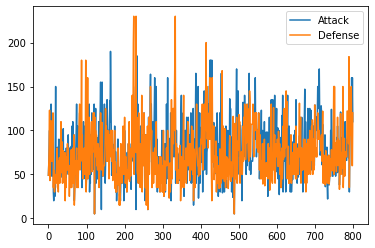

In [ ]:
df2 = pokemon.loc[:, ["Attack", "Defense"]]
df2.plot()

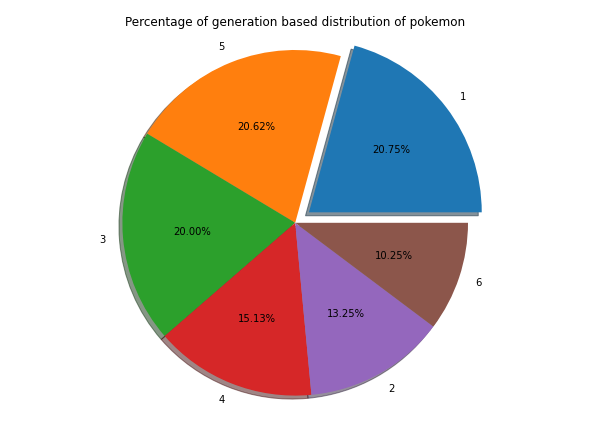

In [ ]:
generation =  dict(pokemon['Generation'].value_counts())
gen_counts = generation.values() # No of pokemon in each generation
gen = generation.keys()  # Type of generation

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon")
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

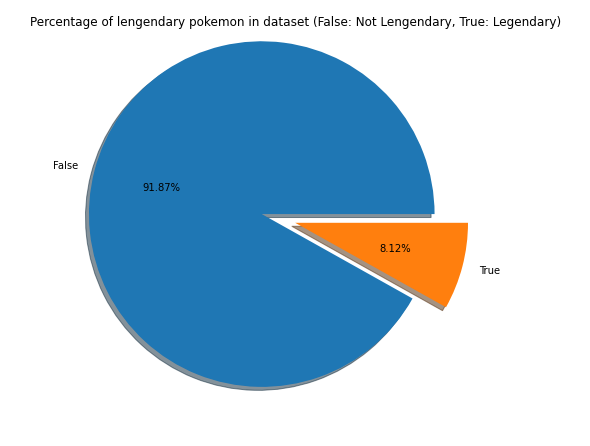

In [ ]:
generation =  dict(pokemon['Legendary'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemon in dataset (False: Not Lengendary, True: Legendary)")
ax = fig.add_axes([0,0,1,1])
explode = (0.2, 0)  # explode 1st slice
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

# Data Preprocessing

In [ ]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")

In [ ]:
# Convert "Legendary" column, False is converted to 0 and True is converted to 1.
pokemon["Legendary"] = pokemon["Legendary"].astype(int)

In [ ]:
h1 = FeatureHasher(n_features=5, input_type='string')
h2 = FeatureHasher(n_features=5, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])

In [ ]:
# Convert to dataframe
d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())

# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.
pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)

In [ ]:
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
0,1,Bulbasaur,45,49,49,65,65,45,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
2,3,Venusaur,80,82,83,100,100,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
4,5,Charmander,39,52,43,60,50,65,1,0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
x = pokemon.loc[pokemon["#"]==266].values[:, 2:][0]
print(x)
y = pokemon.loc[pokemon["#"]==298].values[:, 2:][0]
print(y)
z = np.concatenate((x,y))
z

[50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0]
[70 70 40 60 40 60 3 0 2.0 0.0 0.0 0.0 -1.0 2.0 0.0 0.0 0.0 0.0]


array([50, 64, 50, 45, 50, 41, 2, 0, 0.0, -1.0, -1.0, 1.0, 1.0, 1.0, 0.0,
       1.0, 1.0, 1.0, 70, 70, 40, 60, 40, 60, 3, 0, 2.0, 0.0, 0.0, 0.0,
       -1.0, 2.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [ ]:
data = []
i = 0
for t in combats.itertuples():
    i += 1
    print(i)
    first_pokemon = t[1]
    second_pokemon = t[2]
    winner = t[3]
    
    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0]
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0]
    diff = (x-y)[:6]
    z = np.concatenate((x,y))
    
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)
    

Streaming output truncated to the last 5000 lines.
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
45158
4

In [ ]:
data = np.asarray(data)

In [ ]:
X = data[:, :-1].astype(int)
y = data[:, -1].astype(int)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(train_x, train_y)
pred = model.predict(test_x)
#print('Accuracy of {}:'.format(name), accuracy_score(pred, test_y))

In [ ]:
print('Accuracy :', accuracy_score(pred, test_y))
print(classification_report(test_y, pred))

Accuracy : 0.94808
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5941
           1       0.95      0.95      0.95      6559

    accuracy                           0.95     12500
   macro avg       0.95      0.95      0.95     12500
weighted avg       0.95      0.95      0.95     12500

